# Company data 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import seaborn as sns 

In [2]:
company=pd.read_csv("C:/Users/icon/Downloads/Company_Data.csv")

In [3]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
company.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
company.Sales.unique()

array([ 9.5 , 11.22, 10.06,  7.4 ,  4.15, 10.81,  6.63, 11.85,  6.54,
        4.69,  9.01, 11.96,  3.98, 10.96, 11.17,  8.71,  7.58, 12.29,
       13.91,  8.73,  6.41, 12.13,  5.08,  5.87, 10.14, 14.9 ,  8.33,
        5.27,  2.99,  7.81, 13.55,  8.25,  6.2 ,  8.77,  2.67, 11.07,
        8.89,  4.95,  6.59,  3.24,  2.07,  7.96, 10.43,  4.12,  4.16,
        4.56, 12.44,  4.38,  3.91, 10.61,  1.42,  4.42,  7.91,  6.92,
        4.9 ,  6.85, 11.91,  0.91,  5.42,  5.21,  8.32,  7.32,  1.82,
        8.47,  7.8 ,  8.85, 13.39,  7.99,  9.46,  6.5 ,  5.52, 12.61,
        8.55, 10.64,  7.7 ,  4.43,  9.14,  8.01,  7.52, 11.62,  2.23,
        8.7 , 11.7 ,  6.56,  7.95,  5.33,  4.81,  4.53,  8.86,  8.39,
        5.58,  9.48,  7.45, 12.49,  4.88,  4.11,  5.3 ,  5.07,  4.62,
        5.55,  0.16,  3.47,  8.98,  9.  ,  6.62,  6.67,  6.01,  9.31,
        8.54,  8.8 ,  7.57,  7.37,  6.87, 11.67,  6.88,  8.19,  8.87,
        9.34, 11.27,  6.52,  4.96,  4.47,  8.41,  9.54,  7.62,  3.67,
        6.44,  5.17,

In [7]:
#Complete fraud_check dataset
label_encoder = preprocessing.LabelEncoder()
company['ShelveLoc']= label_encoder.fit_transform(company['ShelveLoc'])
company['Urban']= label_encoder.fit_transform(company['Urban'])
company['US']= label_encoder.fit_transform(company['US'])
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


#### As from above table we know the sales has different values, for making a desicion we want to find out the relations 

## Visualizations

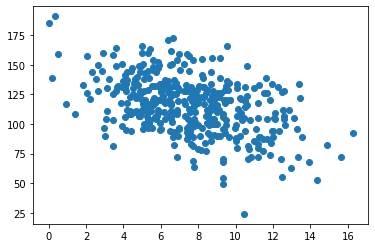

In [18]:
import matplotlib.pyplot as plt
plt.scatter(company['Sales'],company['Price'])

C:\Users\icon\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

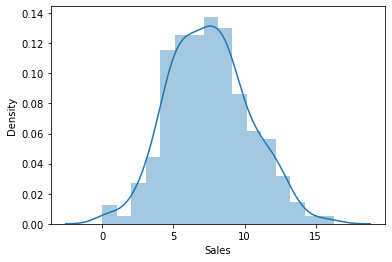

In [19]:
import seaborn as sns
sns.distplot(company['Sales'])

<AxesSubplot:>

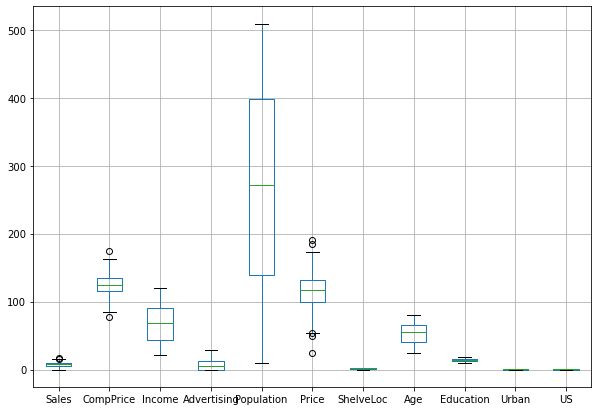

In [20]:
plt.figure(figsize=(10,7))
company.boxplot()

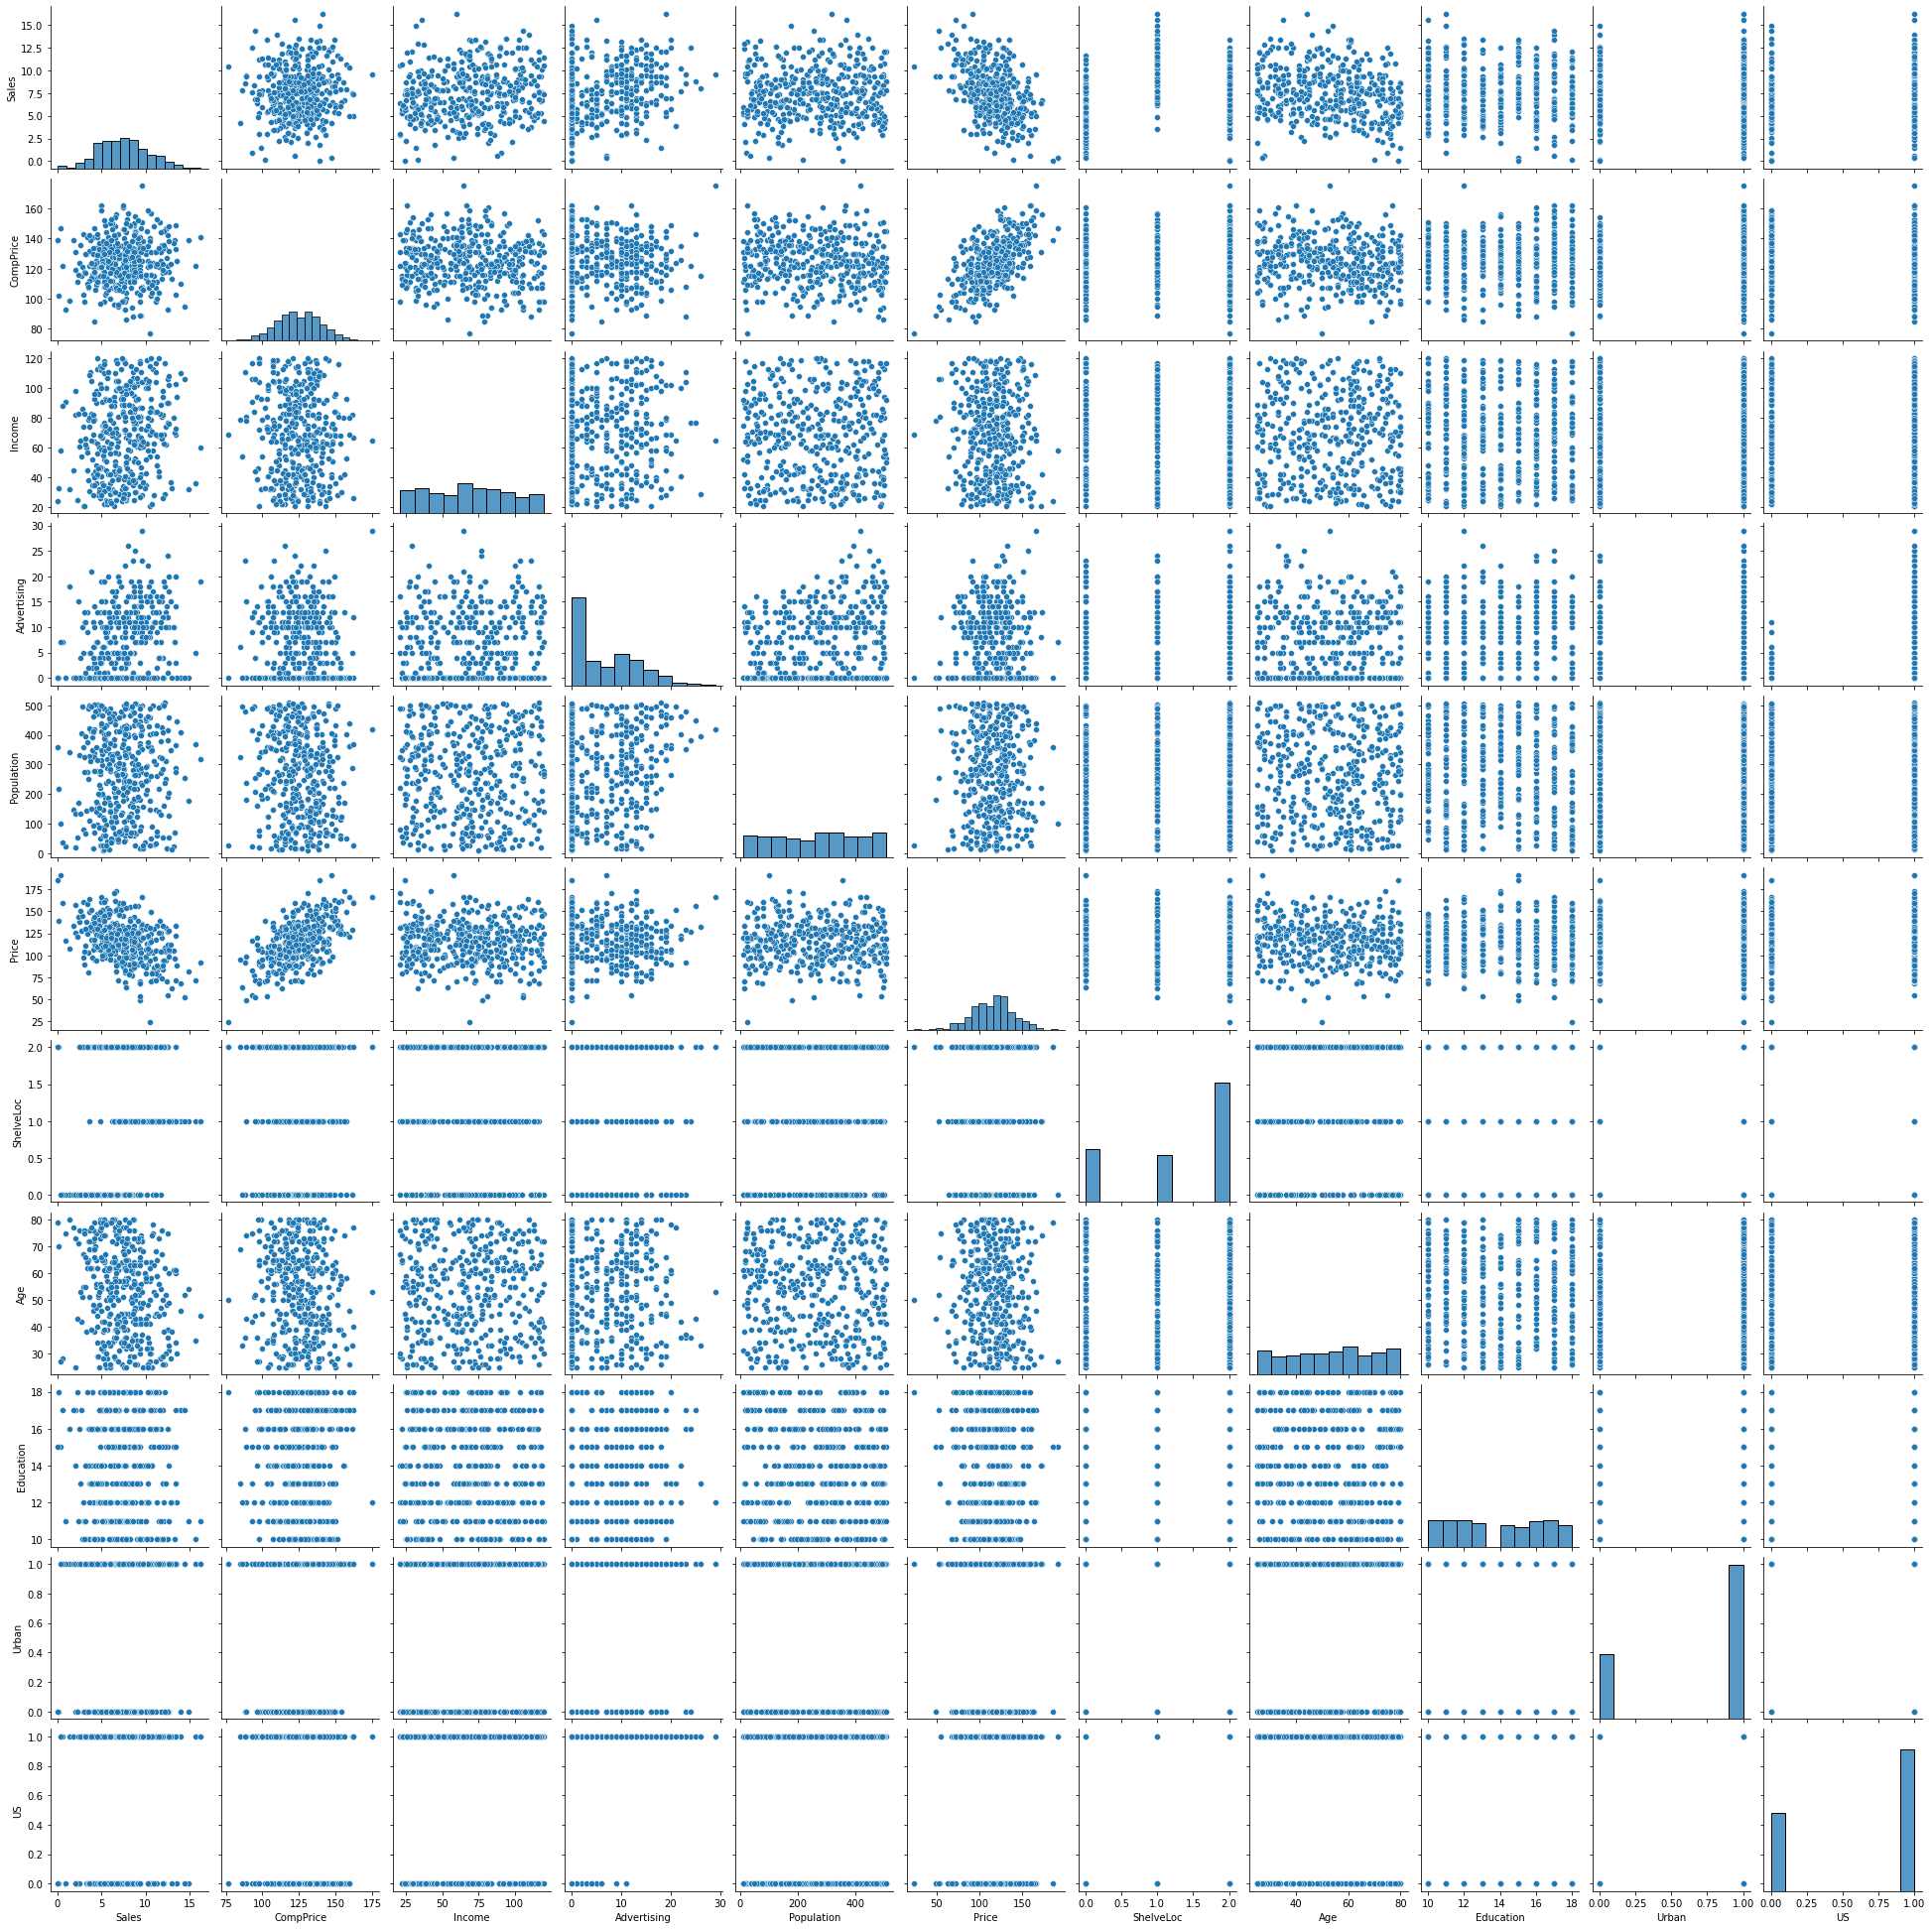

In [21]:
sns.pairplot(company)

C:\Users\icon\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales', ylabel='Price'>

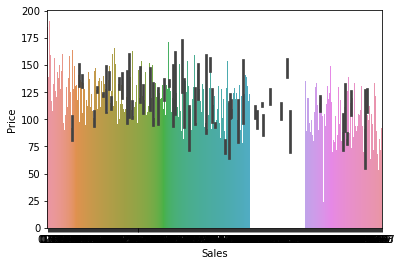

In [31]:
import seaborn as sns
sns.barplot(company.Sales,company.Price)

### For better predictionof data, calculate  the pps_score

In [32]:
!pip install ppscore
import ppscore as pps

In [33]:
x=company.iloc[:,1:]
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [34]:
y=company.iloc[:,0]
y

0       9.50
1      11.22
2      10.06
3       7.40
4       4.15
       ...  
395    12.57
396     6.14
397     7.41
398     5.94
399     9.71
Name: Sales, Length: 400, dtype: float64

In [35]:
# pps.score(df, "feature_column", "target_column")  syntax
pps.score(company,'CompPrice','Sales')

{'x': 'CompPrice',
 'y': 'Sales',
 'ppscore': 0,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 2.2621749999999996,
 'model_score': 2.725606922452547,
 'model': DecisionTreeRegressor()}

In [36]:
#calculate the whole PPS matrix
pps.matrix(company)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Sales,Sales,1.0,predict_itself,True,None,0.0000,1.000000,None
1,Sales,CompPrice,0.0,regression,True,mean absolute error,12.2150,17.223333,DecisionTreeRegressor()
2,Sales,Income,0.0,regression,True,mean absolute error,23.6325,30.317083,DecisionTreeRegressor()
3,Sales,Advertising,0.0,regression,True,mean absolute error,5.7300,6.332500,DecisionTreeRegressor()
4,Sales,Population,0.0,regression,True,mean absolute error,127.0450,165.681250,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
116,US,ShelveLoc,0.0,regression,True,mean absolute error,0.6925,0.759865,DecisionTreeRegressor()
117,US,Age,0.0,regression,True,mean absolute error,13.8775,13.956625,DecisionTreeRegressor()
118,US,Education,0.0,regression,True,mean absolute error,2.2850,2.304601,DecisionTreeRegressor()
119,US,Urban,0.0,regression,True,mean absolute error,0.2950,0.416724,DecisionTreeRegressor()


### Above matrix shows that decision tree classifier cant build with this dataset for prediction of sales, so we build a decision treee classifier on this dataset.

In [37]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [38]:
label_encoder = preprocessing.LabelEncoder()
company['Sales']= label_encoder.fit_transform(company['Sales'])

In [40]:
array = company.values
X = array[:,1:]
y = array[:,0]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [42]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [43]:
#Find the accuracy
model.score(X_test,y_test)

0.2503855992662488